# Hello Image Classification

This basic introduction to OpenVINO™ shows how to do inference with an image classification model.

A pre-trained [MobileNetV3 model](https://docs.openvino.ai/2024/omz_models_model_mobilenet_v3_small_1_0_224_tf.html) from [Open Model Zoo](https://github.com/openvinotoolkit/open_model_zoo/) is used in this tutorial. For more information about how OpenVINO IR models are created, refer to the [TensorFlow to OpenVINO](../tensorflow-classification-to-openvino/tensorflow-classification-to-openvino.ipynb) tutorial.


#### Table of contents:

- [Imports](#Imports)
- [Download the Model and data samples](#Download-the-Model-and-data-samples)
- [Select inference device](#Select-inference-device)
- [Load the Model](#Load-the-Model)
- [Load an Image](#Load-an-Image)
- [Do Inference](#Do-Inference)



In [1]:
import platform

# Install openvino package
%pip install -q "openvino>=2023.1.0" opencv-python tqdm

if platform.system() != "Windows":
    %pip install -q "matplotlib>=3.4"
else:
    %pip install -q "matplotlib>=3.4,<3.7"



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Imports
[back to top ⬆️](#Table-of-contents:)


In [1]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import openvino as ov

# Fetch `notebook_utils` module
import requests

r = requests.get(
    url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/utils/notebook_utils.py",
)

open("notebook_utils.py", "w").write(r.text)

from notebook_utils import download_file

## Download the Model and data samples
[back to top ⬆️](#Table-of-contents:)


In [2]:
base_artifacts_dir = Path("./artifacts").expanduser()

model_name = "v3-small_224_1.0_float"
model_xml_name = f"{model_name}.xml"
model_bin_name = f"{model_name}.bin"

model_xml_path = base_artifacts_dir / model_xml_name

base_url = "https://storage.openvinotoolkit.org/repositories/openvino_notebooks/models/mobelinet-v3-tf/FP32/"

if not model_xml_path.exists():
    download_file(base_url + model_xml_name, model_xml_name, base_artifacts_dir)
    download_file(base_url + model_bin_name, model_bin_name, base_artifacts_dir)
else:
    print(f"{model_name} already downloaded to {base_artifacts_dir}")

artifacts\v3-small_224_1.0_float.xml:   0%|          | 0.00/294k [00:00<?, ?B/s]

artifacts\v3-small_224_1.0_float.bin:   0%|          | 0.00/4.84M [00:00<?, ?B/s]

## Select inference device
[back to top ⬆️](#Table-of-contents:)

select device from dropdown list for running inference using OpenVINO

In [3]:
import ipywidgets as widgets

core = ov.Core()
device = widgets.Dropdown(
    options=core.available_devices + ["AUTO"],
    value="AUTO",
    description="Device:",
    disabled=False,
)

device

Dropdown(description='Device:', index=3, options=('CPU', 'GPU', 'NPU', 'AUTO'), value='AUTO')

## Load the Model
[back to top ⬆️](#Table-of-contents:)


In [31]:
core = ov.Core()
model = core.read_model(model=model_xml_path)
compiled_model = core.compile_model(model=model, device_name=device.value)

output_layer = compiled_model.output(0)

## Load an Image
[back to top ⬆️](#Table-of-contents:)


data\phpCy3TWh.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

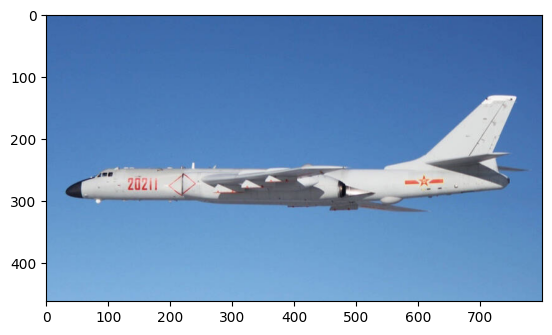

In [33]:
# Download the image from the openvino_notebooks storage
image_filename = download_file(
    "https://img.ltn.com.tw/Upload/news/600/2022/08/02/phpCy3TWh.jpg",
    directory="data",
)

# The MobileNet model expects images in RGB format.
image = cv2.cvtColor(cv2.imread(filename=str(image_filename)), code=cv2.COLOR_BGR2RGB)

# Resize to MobileNet image shape.
input_image = cv2.resize(src=image, dsize=(224, 224))

# Reshape to model input shape.
input_image = np.expand_dims(input_image, 0)
plt.imshow(image);

## Do Inference
[back to top ⬆️](#Table-of-contents:)


In [34]:
result_infer = compiled_model([input_image])[output_layer]
result_index = np.argmax(result_infer)

In [35]:
imagenet_filename = download_file(
    "https://storage.openvinotoolkit.org/repositories/openvino_notebooks/data/data/datasets/imagenet/imagenet_2012.txt",
    directory="data",
)

imagenet_classes = imagenet_filename.read_text().splitlines()

'data\imagenet_2012.txt' already exists.


In [38]:
# The model description states that for this model, class 0 is a background.
# Therefore, a background must be added at the beginning of imagenet_classes.
imagenet_classes = ["background"] + imagenet_classes

imagenet_classes[result_index]

'n04552348 warplane, military plane'